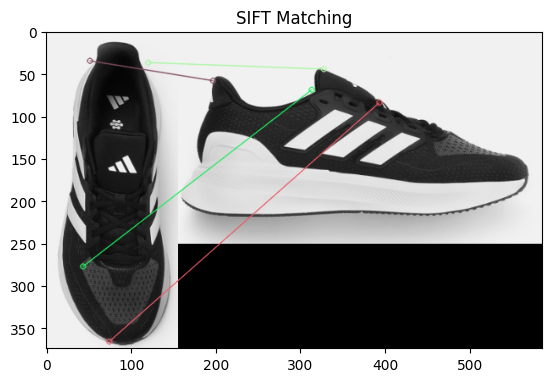

In [2]:
import cv2
import matplotlib.pyplot as plt


img1 = cv2.imread("/content/shoe1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/shoe2.png", cv2.IMREAD_GRAYSCALE)

# SIFT detector
sift = cv2.SIFT_create()

# Detect and compute keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher for matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)

plt.imshow(img_matches)
plt.title('SIFT Matching')
plt.show()


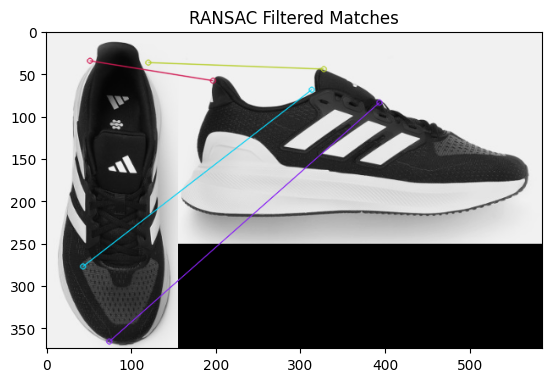

In [3]:
import numpy as np

# Extract point coordinates
src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Compute Homography with RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Draw inliers only
matchesMask = mask.ravel().tolist()
inlier_matches = [m for m, inlier in zip(good, matchesMask) if inlier]

img_ransac = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None, flags=2)
plt.imshow(img_ransac)
plt.title('RANSAC Filtered Matches')
plt.show()


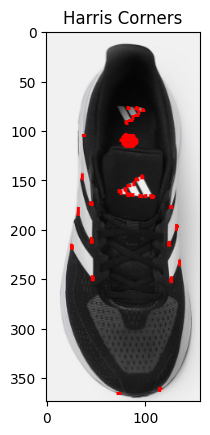

In [4]:
img = cv2.imread("/content/shoe1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()
